Terminal comamnds for training new MVA for specific categories


In [5]:
# use --vbf flag if you want to train with VBF production category, if not then ggH category is chosen
# ! python my_trainer_withWeight_gpu.py --name WgtOff_includeQGL
# ! nohup python my_trainer_withWeight_gpu.py --name test &> output.log
# ! python my_trainer_withWeight_gpu.py --name WgtON_original_AN_BDT --year 2018
# ! python my_trainer_withWeight_gpu.py --name WgtON_original_AN_BDT_DyOnly --year 2018
# ! python my_trainer_withWeight_gpu.py --name WgtON_original_AN_BDT_DyOnly_noDimuRap --year 2018
# ! nohup python my_trainer_withWeight_gpu.py --name WgtON_original_AN_BDT_Sept27 --year 2017 &> output2017.log
! nohup python my_trainer_withWeight_gpu.py --name WgtON_original_AN_BDT_noDimuRap_Sept27 --year 2016preVFP &> out2016pre.log

In [5]:
import coffea.util as util
# coffea.util

In [65]:
! ls /depot/cms/users/yun79/hmm/trained_MVAs/bdt_test_2018

scalers_test_2018_0.npy  scalers_test_2018_3.npy  test_2018_2.pkl
scalers_test_2018_1.npy  test_2018_0.pkl	  test_2018_3.pkl
scalers_test_2018_2.npy  test_2018_1.pkl


In [72]:
! ls /depot/cms/users/yun79/hmm/trained_MVAs/bdt_WgtOff_includeQGL_2018

scalers_WgtOff_includeQGL_2018_0.npy  WgtOff_includeQGL_2018_0.pkl
scalers_WgtOff_includeQGL_2018_1.npy  WgtOff_includeQGL_2018_1.pkl
scalers_WgtOff_includeQGL_2018_2.npy  WgtOff_includeQGL_2018_2.pkl
scalers_WgtOff_includeQGL_2018_3.npy  WgtOff_includeQGL_2018_3.pkl


In [94]:
stage2_save_path = "/work/users/yun79/stage2_output/BDT_test_WgtON_original_AN_BDT_DyOnly_AllSigNBkg_NewBDTedges20Sept2024" # path where stage2 output is saved 
import awkward as ak
events = ak.from_parquet(stage2_save_path + "/ggh/2018/processed_events_bkgMC*.parquet")
# events = ak.from_parquet(stage2_save_path + "/ggh/2018/processed_events_sigMC_ggh.parquet")

not_identical = ak.sum(events.subCategory_idx != events.subCategory_idx_val)
rate = not_identical/len(events.subCategory_idx)
print(rate)
print(ak.sum(events.subCategory_idx ==0))
print(ak.sum(events.subCategory_idx_val ==0))

0.2667076541487307
3976748
3978301


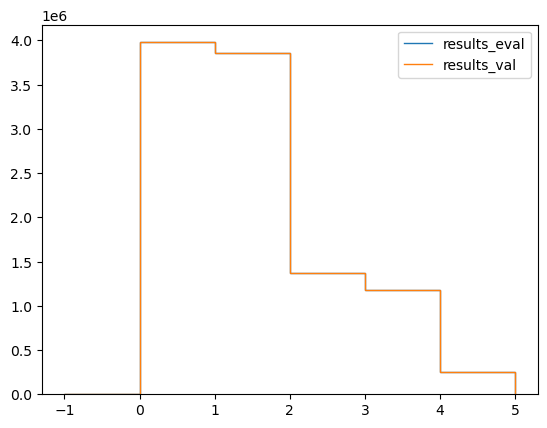

In [84]:
import numpy as np
import matplotlib.pyplot as plt
events = ak.from_parquet(stage2_save_path + "/ggh/2018/processed_events_bkgMC*.parquet")
# events = ak.from_parquet(stage2_save_path + "/ggh/2018/processed_events_sigMC_ggh.parquet")
binning = np.linspace(-1,5,7)
results_eval, edges = np.histogram(events.subCategory_idx ,bins=binning)
plt.stairs(results_eval, edges=edges, label="results_eval")
results_val, edges = np.histogram(events.subCategory_idx_val ,bins=binning)
plt.stairs(results_val, edges=edges, label="results_val")
plt.legend()
plt.show()

In [68]:
! ls /work/users/yun79/stage2_output/BDT_test_WgtON_original_AN_BDT_DyOnly_AllSigNBkg_NewBDTedges20Sept2024/ggh/2018

processed_events_bkgMC_dy.parquet   processed_events_data.parquet
processed_events_bkgMC_ewk.parquet  processed_events_sigMC_ggh.parquet
processed_events_bkgMC_st.parquet   processed_events_sigMC_vbf.parquet
processed_events_bkgMC_tt.parquet


In [ ]:
0.26530018528451865